# Neural Networks with TensorFlow and Keras 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
print(pd.__version__)

0.22.0


In [4]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

1.8.0


## First Step: Load Data and disassemble for our purposes
### We need a few more data point samples for this approach

In [5]:
!curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/workshops/deep-learning/data/insurance-customers-1500.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5421  100  5421    0     0  20456      0 --:--:-- --:--:-- --:--:-- 20456


In [7]:
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [8]:
y=df['group']

In [9]:
df.drop('group', axis='columns', inplace=True)

In [10]:
X = df.as_matrix()

In [11]:
df.describe()

,max speed,age,thousand km per year
count,1500.000000,1500.000000,1500.000000
mean,171.386000,44.969333,30.511333
std,19.269126,16.935040,15.112317
min,118.000000,18.000000,5.000000
25%,158.000000,32.000000,18.000000
50%,170.000000,42.000000,29.000000
75%,187.000000,55.000000,42.000000
max,216.000000,90.000000,84.000000


## Second Step: Deep Learning as Alchemy

In [12]:
# ignore this, it is just technical code
# should come from a lib, consider it to appear magically 
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#AAAA00'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True, fixed=None, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        grid_X = np.array(np.c_[yy.ravel(), xx.ravel()])
        if fixed:
            fill_values = np.full((len(grid_X), 1), fixed)
            grid_X = np.append(grid_X, fill_values, axis=1)
        Z = clf.predict(grid_X)
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if print:
        plt.scatter(x_data, y_data, c=colors, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)
    if fname:
        plt.savefig(fname)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((900, 3), (900,), (600, 3), (600,))

In [16]:
# tiny little pieces of feature engeneering
num_categories = 3

y_train_categorical = tf.keras.utils.to_categorical(y_train, num_categories)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_categories)

In [17]:
inputs = tf.keras.Input(name='input', shape=(3, ))
x = tf.keras.layers.Dense(100, name='hidden1', activation='relu')(inputs)
x = tf.keras.layers.Dense(100, name='hidden2', activation='relu')(x)
predictions = tf.keras.layers.Dense(3, name='softmax', activation='softmax')(x)
model = tf.keras.models.Model(inputs=inputs, outputs=predictions)

# loss function: http://cs231n.github.io/linear-classify/#softmax
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3)                 0         
_________________________________________________________________
hidden1 (Dense)              (None, 100)               400       
_________________________________________________________________
hidden2 (Dense)              (None, 100)               10100     
_________________________________________________________________
softmax (Dense)              (None, 3)                 303       
Total params: 10,803
Trainable params: 10,803
Non-trainable params: 0
_________________________________________________________________


In [18]:
%time model.fit(X_train, y_train_categorical, epochs=500, batch_size=100)

Epoch 1/500
900/900 [==============================] - 3s 4ms/step - loss: 6.8368 - acc: 0.3389
Epoch 2/500
900/900 [==============================] - 0s 90us/step - loss: 4.3375 - acc: 0.3778
Epoch 3/500
900/900 [==============================] - 0s 77us/step - loss: 2.7201 - acc: 0.3822
Epoch 4/500
900/900 [==============================] - 0s 77us/step - loss: 1.5791 - acc: 0.3744
Epoch 5/500
900/900 [==============================] - 0s 79us/step - loss: 1.1002 - acc: 0.4944
Epoch 6/500
900/900 [==============================] - 0s 60us/step - loss: 0.9161 - acc: 0.5867
Epoch 7/500
900/900 [==============================] - 0s 76us/step - loss: 0.8653 - acc: 0.6178
Epoch 8/500
900/900 [==============================] - 0s 77us/step - loss: 0.8448 - acc: 0.6367
Epoch 9/500
900/900 [==============================] - 0s 77us/step - loss: 0.8490 - acc: 0.6344
Epoch 10/500
900/900 [==============================] - 0s 76us/step - loss: 0.8886 - acc: 0.6144
Epoch 11/500
900/900 [========

900/900 [==============================] - 0s 71us/step - loss: 0.8055 - acc: 0.6533
Epoch 85/500
900/900 [==============================] - 0s 81us/step - loss: 0.8132 - acc: 0.6400
Epoch 86/500
900/900 [==============================] - 0s 78us/step - loss: 0.7690 - acc: 0.6778
Epoch 87/500
900/900 [==============================] - 0s 58us/step - loss: 0.7516 - acc: 0.6744
Epoch 88/500
900/900 [==============================] - 0s 57us/step - loss: 0.7709 - acc: 0.6678
Epoch 89/500
900/900 [==============================] - 0s 60us/step - loss: 0.8033 - acc: 0.6322
Epoch 90/500
900/900 [==============================] - 0s 63us/step - loss: 0.8119 - acc: 0.6511
Epoch 91/500
900/900 [==============================] - 0s 58us/step - loss: 0.8095 - acc: 0.6544
Epoch 92/500
900/900 [==============================] - 0s 59us/step - loss: 0.7959 - acc: 0.6667
Epoch 93/500
900/900 [==============================] - 0s 60us/step - loss: 0.8575 - acc: 0.6533
Epoch 94/500
900/900 [===========

900/900 [==============================] - 0s 48us/step - loss: 0.7725 - acc: 0.6700
Epoch 168/500
900/900 [==============================] - 0s 122us/step - loss: 0.7684 - acc: 0.6711
Epoch 169/500
900/900 [==============================] - 0s 135us/step - loss: 0.8131 - acc: 0.6422
Epoch 170/500
900/900 [==============================] - 0s 106us/step - loss: 0.8456 - acc: 0.6422
Epoch 171/500
900/900 [==============================] - 0s 124us/step - loss: 0.8006 - acc: 0.6600
Epoch 172/500
900/900 [==============================] - 0s 110us/step - loss: 0.8090 - acc: 0.6433
Epoch 173/500
900/900 [==============================] - 0s 112us/step - loss: 0.8866 - acc: 0.6044
Epoch 174/500
900/900 [==============================] - 0s 107us/step - loss: 0.8315 - acc: 0.6344
Epoch 175/500
900/900 [==============================] - 0s 66us/step - loss: 0.7943 - acc: 0.6644
Epoch 176/500
900/900 [==============================] - 0s 62us/step - loss: 0.7436 - acc: 0.6856
Epoch 177/500
900

900/900 [==============================] - 0s 29us/step - loss: 0.7635 - acc: 0.6622
Epoch 250/500
900/900 [==============================] - 0s 52us/step - loss: 0.7891 - acc: 0.6556
Epoch 251/500
900/900 [==============================] - 0s 38us/step - loss: 0.7727 - acc: 0.6711
Epoch 252/500
900/900 [==============================] - 0s 35us/step - loss: 0.7540 - acc: 0.6656
Epoch 253/500
900/900 [==============================] - 0s 35us/step - loss: 0.7670 - acc: 0.6744
Epoch 254/500
900/900 [==============================] - 0s 35us/step - loss: 0.8063 - acc: 0.6667
Epoch 255/500
900/900 [==============================] - 0s 38us/step - loss: 0.8454 - acc: 0.6378
Epoch 256/500
900/900 [==============================] - 0s 52us/step - loss: 0.7947 - acc: 0.6756
Epoch 257/500
900/900 [==============================] - 0s 35us/step - loss: 0.8001 - acc: 0.6711
Epoch 258/500
900/900 [==============================] - 0s 52us/step - loss: 0.7719 - acc: 0.6667
Epoch 259/500
900/900 [=

900/900 [==============================] - 0s 35us/step - loss: 0.7497 - acc: 0.6889
Epoch 332/500
900/900 [==============================] - 0s 52us/step - loss: 0.7648 - acc: 0.6722
Epoch 333/500
900/900 [==============================] - 0s 35us/step - loss: 0.7774 - acc: 0.6667
Epoch 334/500
900/900 [==============================] - 0s 52us/step - loss: 0.7566 - acc: 0.6733
Epoch 335/500
900/900 [==============================] - 0s 35us/step - loss: 0.7665 - acc: 0.6733
Epoch 336/500
900/900 [==============================] - 0s 52us/step - loss: 0.7771 - acc: 0.6622
Epoch 337/500
900/900 [==============================] - 0s 49us/step - loss: 0.7421 - acc: 0.6800
Epoch 338/500
900/900 [==============================] - 0s 36us/step - loss: 0.7445 - acc: 0.6767
Epoch 339/500
900/900 [==============================] - 0s 35us/step - loss: 0.8578 - acc: 0.6144
Epoch 340/500
900/900 [==============================] - 0s 69us/step - loss: 0.7978 - acc: 0.6600
Epoch 341/500
900/900 [=

900/900 [==============================] - 0s 35us/step - loss: 0.7817 - acc: 0.6822
Epoch 414/500
900/900 [==============================] - 0s 54us/step - loss: 0.8081 - acc: 0.6567
Epoch 415/500
900/900 [==============================] - 0s 29us/step - loss: 0.7669 - acc: 0.6733
Epoch 416/500
900/900 [==============================] - 0s 52us/step - loss: 0.7688 - acc: 0.6756
Epoch 417/500
900/900 [==============================] - 0s 35us/step - loss: 0.8022 - acc: 0.6522
Epoch 418/500
900/900 [==============================] - 0s 35us/step - loss: 0.7963 - acc: 0.6489
Epoch 419/500
900/900 [==============================] - 0s 35us/step - loss: 0.7407 - acc: 0.6867
Epoch 420/500
900/900 [==============================] - 0s 35us/step - loss: 0.7644 - acc: 0.6789
Epoch 421/500
900/900 [==============================] - 0s 52us/step - loss: 0.7484 - acc: 0.6811
Epoch 422/500
900/900 [==============================] - 0s 35us/step - loss: 0.7400 - acc: 0.6889
Epoch 423/500
900/900 [=

900/900 [==============================] - 0s 35us/step - loss: 0.7419 - acc: 0.6922
Epoch 496/500
900/900 [==============================] - 0s 52us/step - loss: 0.7287 - acc: 0.6933
Epoch 497/500
900/900 [==============================] - 0s 35us/step - loss: 0.7338 - acc: 0.6956
Epoch 498/500
900/900 [==============================] - 0s 52us/step - loss: 0.7379 - acc: 0.6922
Epoch 499/500
900/900 [==============================] - 0s 35us/step - loss: 0.7301 - acc: 0.6956
Epoch 500/500
900/900 [==============================] - 0s 52us/step - loss: 0.7246 - acc: 0.6911
Wall time: 27.8 s


In [19]:
train_loss, train_accuracy = model.evaluate(X_train, y_train_categorical, batch_size=100)
train_accuracy

900/900 [==============================] - 0s 76us/step


0.6822222140100267

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, batch_size=100)
test_accuracy

600/600 [==============================] - 0s 23us/step


0.6833333273728689

In [21]:
model.save('insurance.hdf5')

### Look at all the different shapes for different kilometers per year
* now we have three dimensions, so we need to set one to a certain number

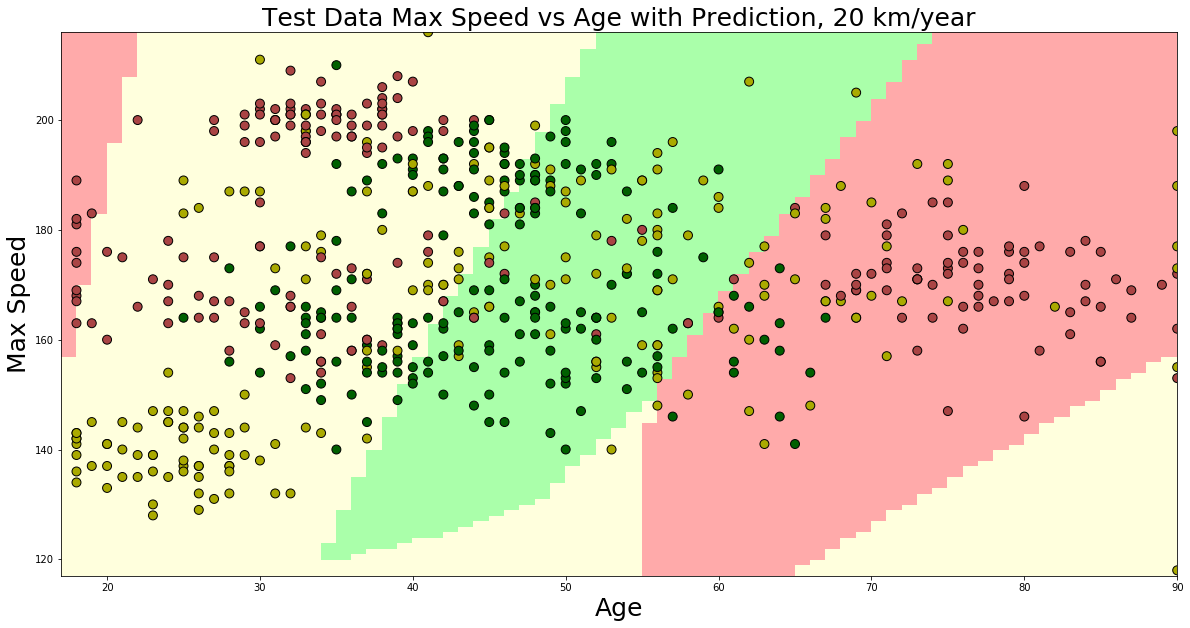

In [22]:
kms_per_year = 20
plotPrediction(model, X_test[:, 1], X_test[:, 0],
               'Age', 'Max Speed', y_test,
                fixed = kms_per_year,
                title="Test Data Max Speed vs Age with Prediction, 20 km/year")

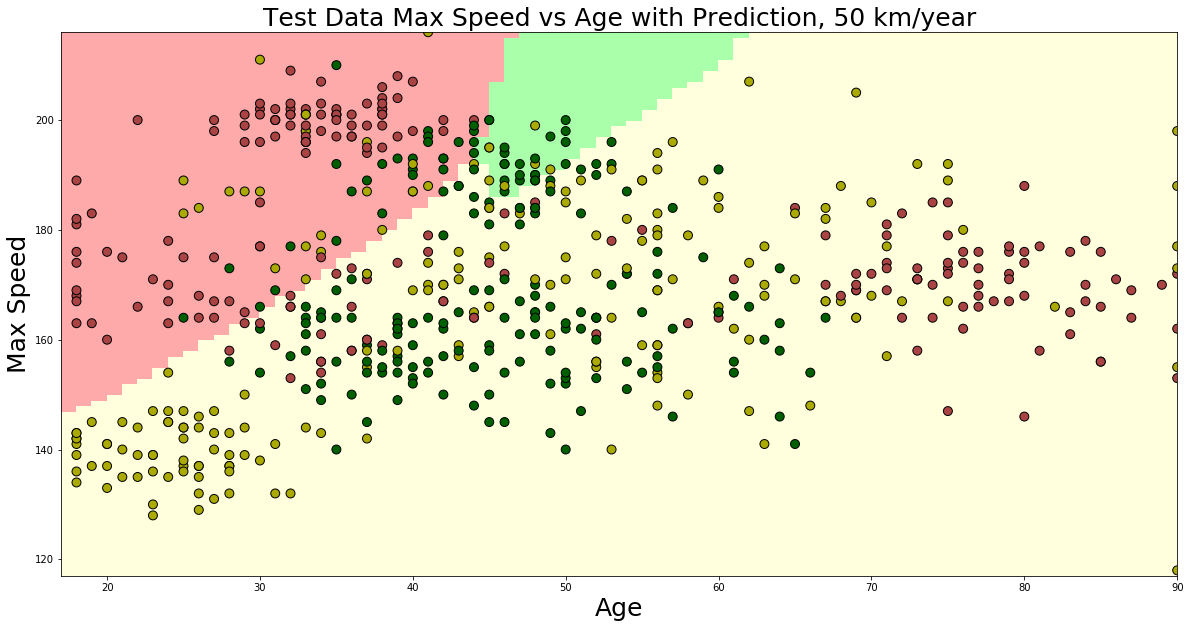

In [23]:
kms_per_year = 50
plotPrediction(model, X_test[:, 1], X_test[:, 0],
               'Age', 'Max Speed', y_test,
                fixed = kms_per_year,
                title="Test Data Max Speed vs Age with Prediction, 50 km/year")

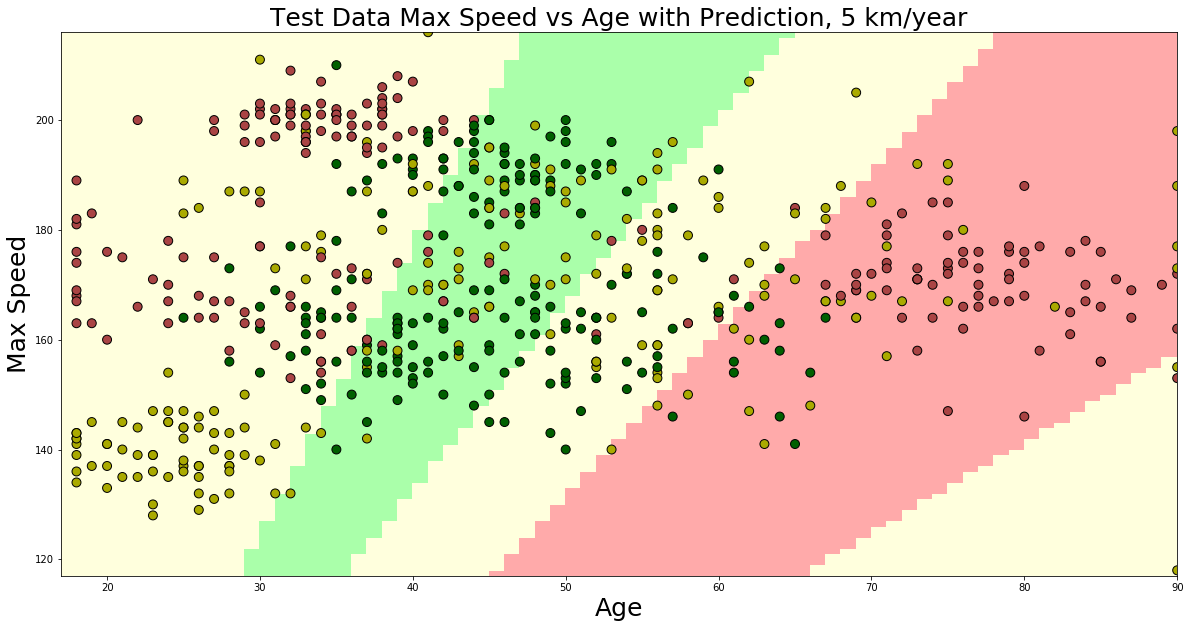

In [24]:
kms_per_year = 5
plotPrediction(model, X_test[:, 1], X_test[:, 0],
               'Age', 'Max Speed', y_test,
                fixed = kms_per_year,
                title="Test Data Max Speed vs Age with Prediction, 5 km/year")